# 4. Missing category Imputation

It is a straightforward and effective technique when the missing data is high. In this technique, We replace missing values with the keyword "Missing"  or any word of choice we want. This technique applies to categorical data. The idea behind this technique is that we create an additional label of missing values. 

We can use this technique without splitting the data, but that is something one must avoid because it may create problems during model deployment.

Advantage:
1. It is easy to implement and easily deployable in production.
2. It captures the missingness of the data.
3. It is quite robust where missing data is quite high.

Dis-Advantages:
1. This technique fails when the number of missing values is small because then we are adding a rare label, that may affect the algorithm performance.
2. This technique increases the cardinality of the variable.

In [1]:
#loading libraries

import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
#loading data
data = pd.read_csv("https://raw.githubusercontent.com/adiag321/Data-Science-datasets/main/House%20Price%20train.csv")

In [3]:
#creating list of variable having missing values greater than 40% 
cat_var_na=[]

for label, content in data.items():
    if pd.api.types.is_string_dtype(content) and data[label].isnull().mean()*100>40:
        cat_var_na.append(label)

print(cat_var_na)

['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']


In [4]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(data,data.SalePrice,test_size=0.3,random_state=24)

X_train.shape, X_test.shape

((1022, 81), (438, 81))

In [5]:
#calculating percentage of missing values
X_train[cat_var_na].isnull().mean()*100

Alley          93.444227
FireplaceQu    46.281800
PoolQC         99.510763
Fence          80.332681
MiscFeature    95.988258
dtype: float64

Here we will use "Missing" tag with those varaibles which have more than 40% of missing values

In [55]:
#creating missing tag function
def missing_tag(data, var, tag):
    
    return data[var].fillna(tag)

In [56]:
def plot_dist_change_cat(data, var1, var2,figsize):
    
    """
    This Function plots 2 graph
    1st- distribution before  missing tag
    2nd- dsitribution after  missing tag
    
    """
    
    #setting the figure size for our distrbution 
    fig = plt.figure(figsize=figsize)
    
    ax = fig.add_subplot(121) #defining where we ant our plot 
    graph = sns.countplot(ax=ax,x=var1, data=data)
    plt.title("Before Missing tag imputation")
    
    for p in graph.patches:
        height = p.get_height()
        graph.text(p.get_x()+p.get_width()/2., height + 0.2,height ,ha="center",fontsize=15)
        
        
    
    ax = fig.add_subplot(122)
    graph = sns.countplot(ax=ax,x=var2, data=data)
    plt.title("After Missing tag imputation")
    
    for p in graph.patches:
        height = p.get_height()
        graph.text(p.get_x()+p.get_width()/2., height + 0.2,height ,ha="center",fontsize=15)


In [57]:
#applying to all the variable having missing values greater than 40%
for var in cat_var_na:
    X_train[var+"_missing"]=missing_tag(X_train, var, "Missing")

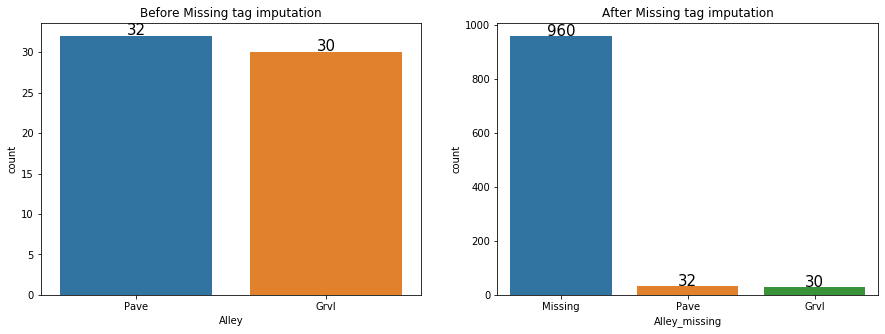

In [58]:
#lets plot for Alley variable
plot_dist_change_cat(X_train, "Alley", "Alley_missing",(15,5))

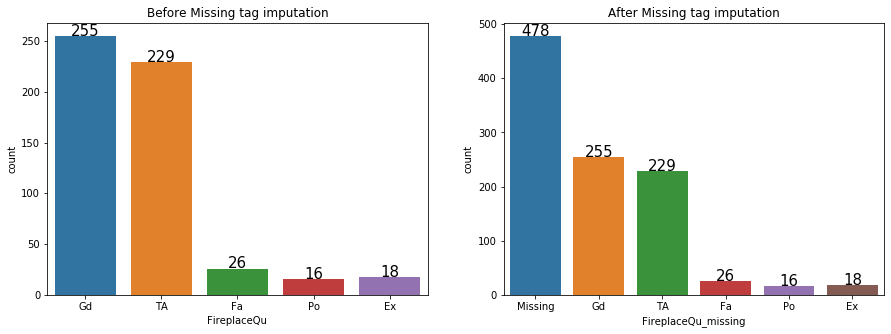

In [59]:
#similary plotting for FireplaceQu
plot_dist_change_cat(X_train, "FireplaceQu", "FireplaceQu_missing",(15,5))